# Шпаргалки по pandas. Часть 1.

In [1]:
%matplotlib inline 
# бэкенд inline популярен для Jupyter Notebooks, потому что он отображает график в 
#самом блокноте сразу под ячейкой, которая создает график

import pandas as pd
import random

In [2]:
# генерируем список целых случайных чисел kol - количество чисел, order -порядок чисел
def list_int(kol,order):
    rezult = [int(round(random.random(),2)*(10**order)) for dd in range(kol)]
    return rezult

In [3]:
# генерируем список строк из дух символов kol - количество строк, order - количество символов в строке
def list_str(kol,order):
    rezult = []
    for _ in range(kol):
        str =''
        for _ in range(order):
            str +=random.choice(list('qwertyuiopasdfghjklzxcvbnm'))
        rezult.append(str)
    return rezult

In [4]:
stlb1 = list_int(10,2)
print(stlb1)

[57, 71, 14, 4, 76, 91, 97, 13, 39, 91]


In [5]:
stlb2 = list_str(10,2)
print(stlb2)

['dr', 'oj', 'tp', 'bh', 'yq', 'rv', 'cd', 'db', 'qk', 'iv']


In [6]:
df = pd.DataFrame({'stlb1':stlb1,'stlb2':stlb2})

In [7]:
# выведем первые 6 строк
df.head(6)

,stlb1,stlb2
0,57,dr
1,71,oj
2,14,tp
3,4,bh
4,76,yq
5,91,rv


In [8]:
# выведем информацию о массиве
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stlb1   10 non-null     int64 
 1   stlb2   10 non-null     object
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [9]:
# Запишем массив в csv файл без индексирования строк
df.to_csv('out.csv', sep='^', index=False)

In [10]:
# Читаем из csv, нулевая строка это имена столбцов
df_duble = pd.read_csv('out.csv', sep='^', header =0)
df_duble.head()

,stlb1,stlb2
0,57,dr
1,71,oj
2,14,tp
3,4,bh
4,76,yq


In [11]:
# Полуим данные по специальностям выпускников колледже полученные в результате 
# исследования American Community Survey 2010–2012, которое находится в общественном доступе. 
# Работа послужила основой для гида по выбору колледжа 
# Economic Guide To Picking A College Major, размещенного на сайте FiveThirtyEight.
data_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv'
df_scul = pd.read_csv(data_url)

In [12]:
df_scul.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


### Рассматриваемый набор данных содержит несколько столбцов, связанных с доходами выпускников по каждой специальности:

    * «Median» — средний заработок работников, которые заняты полным рабочим днем, круглый год;
    * «P25th» — 25-й процентиль заработка;
    * «P75th» — 75-й процентиль заработка;
    * «Rank» — рейтинг специалиста по среднему заработку.

<AxesSubplot:xlabel='Rank'>

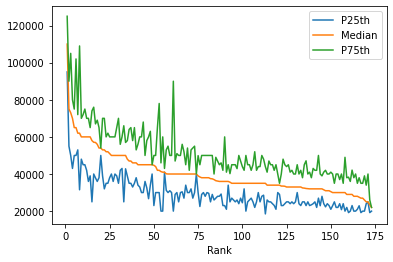

In [13]:
df_scul.plot(x="Rank", y=["P25th", "Median", "P75th"])

In [14]:
# произведем некоторую замену в массиве
df['stlb1'] = df['stlb1'].apply(lambda x:100 if x>50 else x)
df.head(10)

,stlb1,stlb2
0,100,dr
1,100,oj
2,14,tp
3,4,bh
4,100,yq
5,100,rv
6,100,cd
7,13,db
8,39,qk
9,100,iv


In [15]:
# restore
df = pd.read_csv('out.csv', sep='^', header =0)
df.head(10)

,stlb1,stlb2
0,57,dr
1,71,oj
2,14,tp
3,4,bh
4,76,yq
5,91,rv
6,97,cd
7,13,db
8,39,qk
9,91,iv
